Machine Learning (IE406)

Assignment - 6

Lukhi Krunalkumar - 201901449

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import LeaveOneOut

In [ ]:
mat=sc.loadmat('motorcycle.mat')
data=mat['motorcycle']
x=np.array(data[:,0])
#print(x.shape)
x=x.reshape((133,1))
y=data[:,1]
#print(x.shape)
#print(x)


In [ ]:
model = Ridge(alpha=1.0)
"""model.fit(x,y)
w=model.coef_
b=[model.intercept_]
b.extend(w)
theta=b"""
#print(theta)

cv1 = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
cv2 = LeaveOneOut()

#5-fold
print("*5-fold*\n")
score1 = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error', cv=cv1, n_jobs=-1)
print("RMSE: ",np.sqrt(abs(score1)),"\n")
score2 = cross_val_score(model, x, y, scoring='r2', cv=cv1, n_jobs=-1)
print("R_squred: ",abs(score2),"\n")
score3 = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv1, n_jobs=-1)
print("MAE: ",abs(score3),"\n")
score4 = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv1, n_jobs=-1)
print("NMSE: ",abs(score4)/np.var(y),"\n")
print("\n")

#Leave one out
print("*leave-one-out*\n")
score5 = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error', cv=cv2, n_jobs=-1)
print("RMSE: ",np.sqrt(abs(score5)),"\n")
score6 = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv2, n_jobs=-1)
print("MAE: ",abs(score6),"\n")
score7 = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv2, n_jobs=-1)
print("NMSE: ",abs(score7)/np.var(y),"\n")

*5-fold*

RMSE:  [6.80652071 7.22349586 6.76264354 7.14243077 6.17907367] 

R_squred:  [0.01990771 0.13659391 0.05024776 0.06396838 0.12315954] 

MAE:  [35.50024065 42.55943304 37.07420321 41.69120769 34.09492466] 

NMSE:  [0.92616356 1.17483458 0.90251201 1.12297778 0.62904324] 



*leave-one-out*

RMSE:  [ 7.20863095  7.09775144  6.94276573  7.10583842  6.87240317  6.67723931
  6.6414639   6.73077225  6.53353857  6.49735237  6.55271249  6.44286306
  6.36979935  6.33308273  6.0932256   6.2777659   6.01678632  6.42085541
  6.03438087  5.99635678  6.20193805  4.90744594  5.66414148  5.66414148
  5.30409198  4.62050089  3.8030785   5.88125623  3.68375996  2.03955958
  4.1825792   4.3486286   2.06306333  3.82913413  3.7998896   3.89848666
  2.72518808  2.97590985  3.7407648   3.95403224  5.16297172  5.4816128
  6.7660004   4.93554564  6.05846541  7.55118561  6.59369422  1.93021811
  7.23281852  9.49705534  8.29331112  8.13401265  8.45666683  8.97427594
  4.27210494  9.58479705  7.36470216

In [ ]:
theta0=[]
theta1=[]
#print(theta)
res1 = cross_validate(model,x,y,cv=cv1,scoring='neg_mean_absolute_error',return_estimator=True)
res2 = cross_validate(model,x,y,cv=cv2,scoring='neg_mean_absolute_error',return_estimator=True)
for c1 in res1['estimator']:
  theta0.append(c1.intercept_)
  theta1.append(c1.coef_[0])

mean0_1=np.mean(theta0)
mean1_1=np.mean(theta1)
var0_1=np.var(theta0)
var1_1=np.var(theta1)

print("5-fold\n")
print("mean of coefficients: ",mean0_1,mean1_1)
print("variance of coefficients: ",var0_1,var1_1)

for c2 in res2['estimator']:
  theta0.append(c2.intercept_)
  theta1.append(c2.coef_[0])

mean0_2=np.mean(theta0)
mean1_2=np.mean(theta1)
var0_2=np.var(theta0)
var1_2=np.var(theta1)

print("\n")
print("leave-one-out\n")
print("mean of coefficients: ",mean0_2,mean1_2)
print("variance of coefficients: ",var0_2,var1_2)

5-fold

mean of coefficients:  -53.21256233515241 1.0969056662801056
variance of coefficients:  31.513291371126563 0.03628099662651639


leave-one-out

mean of coefficients:  -53.016685331625766 1.090926301006232
variance of coefficients:  1.5752581220271562 0.0016616249867673408


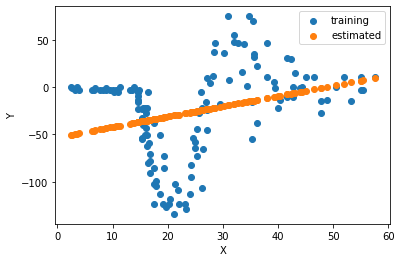

In [ ]:
y_pred_loocv=mean0_2+x*mean1_2
y_pred_kflod=mean0_1+x*mean1_1

plt.figure()
plt.scatter(x,y)
plt.scatter(x,y_pred_loocv)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['training','estimated'])
plt.show()



In [ ]:
print("\n")
print("Variance of 5-fold: ",np.var(abs(score1)))
print("Variance of Leave-one-out: ",np.var(abs(score5)))



Variance of 5-fold:  24.455446794779675
Variance of Leave-one-out:  748.0552175414982


**Observations:**


Variance in 5-fold cross validation is less than leave-one-out.  The reason is that, leave-one-out uses highly correlated trainig data , because we leave only one element in each iterations. So, traing data is not much changed. Highly correlated training data produces the estimate that has larger variance. On the other hand, 5-fold validation uses training data with lesser degree of correlation. In each iterations, there is less overlap in training data as compared to leave-one-out scheme. This leads to smaller variance in estimate. 

